In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Gunashekar Chenna\Downloads\Project-4.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 0: invalid continuation byte

In [32]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


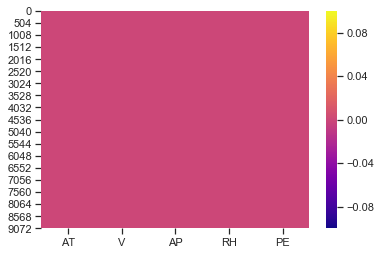

In [34]:
sns.heatmap(df.isnull(),cmap = 'plasma')

In [35]:
temp = df.copy()

In [36]:
type(temp)

pandas.core.frame.DataFrame

In [37]:
df.replace(r'\s+',np.nan,regex=True).replace('',np.nan)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [38]:
x = df.drop(['PE'],axis=1).values
y = df['PE'].values

In [39]:
x

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [40]:
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)


In [42]:
x_train

array([[  15.46,   44.6 , 1017.7 ,   68.2 ],
       [  23.46,   59.27, 1010.6 ,   79.79],
       [  12.75,   44.2 , 1017.59,   81.22],
       ...,
       [  16.81,   38.52, 1018.26,   75.21],
       [  12.8 ,   41.16, 1022.43,   86.19],
       [  32.32,   67.9 , 1006.08,   37.93]])

In [43]:
x_test,x_train

(array([[  28.66,   77.95, 1009.56,   69.07],
        [  17.48,   49.39, 1021.51,   84.53],
        [  14.86,   43.14, 1019.21,   99.14],
        ...,
        [  21.39,   51.3 , 1013.39,   89.05],
        [  14.12,   42.99, 1007.13,   78.16],
        [  17.12,   48.6 , 1007.38,   79.15]]),
 array([[  15.46,   44.6 , 1017.7 ,   68.2 ],
        [  23.46,   59.27, 1010.6 ,   79.79],
        [  12.75,   44.2 , 1017.59,   81.22],
        ...,
        [  16.81,   38.52, 1018.26,   75.21],
        [  12.8 ,   41.16, 1022.43,   86.19],
        [  32.32,   67.9 , 1006.08,   37.93]]))

In [44]:

#L regression
from sklearn.linear_model import LinearRegression


In [45]:
mlr  = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred = mlr.predict(x_test)


In [47]:
print(y_pred)

[431.40265423 458.60744878 462.80845315 ... 449.22321513 466.80517639
 459.42044679]


In [48]:
y_test

array([431.23, 460.01, 461.14, ..., 452.7 , 468.45, 454.47])

In [49]:
x_train.shape

(6378, 4)

In [50]:
y_train.shape

(6378,)

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(x_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
x_test

array([[  28.66,   77.95, 1009.56,   69.07],
       [  17.48,   49.39, 1021.51,   84.53],
       [  14.86,   43.14, 1019.21,   99.14],
       ...,
       [  21.39,   51.3 , 1013.39,   89.05],
       [  14.12,   42.99, 1007.13,   78.16],
       [  17.12,   48.6 , 1007.38,   79.15]])

In [53]:
y_test

array([431.23, 460.01, 461.14, ..., 452.7 , 468.45, 454.47])

In [54]:
y_pred2 = lin_reg_2.predict(poly_reg.fit_transform([[-0.30459819, -0.3865878 ,  1.386707  ,  0.78463873]]))

In [55]:
y_pred2

array([535773.04075854])

In [56]:
y_pred2 = lin_reg_2.predict(poly_reg.fit_transform([[20.86,57.32,1010.24,76.64]]))

In [57]:
y_pred2

array([448.58161578])

In [61]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


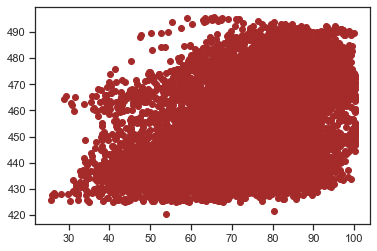

In [62]:
plt.scatter(x = df['RH'],y = df['PE'],color = 'brown')

In [63]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor


In [65]:
dtr = DecisionTreeRegressor(criterion = 'mse' , random_state = 100, max_depth = 4 , min_samples_leaf = 1)

In [66]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=100, splitter='best')

In [67]:
from sklearn.tree import export_graphviz

In [69]:
import pydotplus
export_graphviz(dtr,out_file = 'reg_tree.dot')

In [70]:
f = open('reg_tree.dot')

In [71]:
f.read()

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= 17.895\\nmse = 291.017\\nsamples = 6378\\nvalue = 454.459"] ;\n1 [label="X[0] <= 11.875\\nmse = 88.327\\nsamples = 2643\\nvalue = 471.702"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= 8.505\\nmse = 44.591\\nsamples = 1212\\nvalue = 479.295"] ;\n1 -> 2 ;\n3 [label="X[0] <= 7.045\\nmse = 34.976\\nsamples = 489\\nvalue = 483.819"] ;\n2 -> 3 ;\n4 [label="mse = 28.545\\nsamples = 263\\nvalue = 485.685"] ;\n3 -> 4 ;\n5 [label="mse = 33.687\\nsamples = 226\\nvalue = 481.647"] ;\n3 -> 5 ;\n6 [label="X[3] <= 92.97\\nmse = 27.888\\nsamples = 723\\nvalue = 476.235"] ;\n2 -> 6 ;\n7 [label="mse = 24.904\\nsamples = 599\\nvalue = 477.105"] ;\n6 -> 7 ;\n8 [label="mse = 20.99\\nsamples = 124\\nvalue = 472.033"] ;\n6 -> 8 ;\n9 [label="X[0] <= 14.83\\nmse = 35.196\\nsamples = 1431\\nvalue = 465.272"] ;\n1 -> 9 ;\n10 [label="X[0] <= 13.705\\nmse = 23.365\\nsamples = 804\\nvalue = 468.157"] ;\n9 -> 10 ;\n11 [lab

In [72]:
y_pred3 = dtr.predict(x_test)

In [73]:
y_pred3

array([433.88279149, 457.95713115, 463.87600522, ..., 446.19990602,
       466.05091667, 457.95713115])

In [74]:
y_test

array([431.23, 460.01, 461.14, ..., 452.7 , 468.45, 454.47])

In [82]:
from sklearn.metrics import mean_squared_error,r2_score
mse  = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

4.485908172715393


In [83]:
r2_score(y_test, y_pred3)

0.9281844490728242

In [86]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 20 , random_state = 0)


In [87]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [88]:
y_pred4 = rfr.predict(x_test)

In [89]:
y_test,y_pred4

(array([431.23, 460.01, 461.14, ..., 452.7 , 468.45, 454.47]),
 array([434.157 , 458.291 , 463.8575, ..., 450.046 , 469.076 , 456.931 ]))

In [92]:
from sklearn.metrics import r2_score,confusion_matrix

In [96]:
r2_score(y_test,y_pred4)

0.9592819262316238